In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly .express as px
import numpy as np

In [3]:
df = pd.read_csv("Clean_Top_1000_Youtube_df - youtubers_df.csv")
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Entertainment,"249,500,000",IN,"86,200","2,700",78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,Entertainment,"183,500,000",US,"117,400,000","5,300,000","18,500",http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Music,"165,500,000",US,"7,000,000","24,700",0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Entertainment,"162,600,000",IN,"15,600",166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,Hobby,"113,500,000",US,"3,900,000","12,400",0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Food,"11,700,000",KR,"397,400","14,000",124,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,Film,"11,700,000",IN,"1,100,000","92,500",164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Entertainment,"11,700,000",ID,"211,400",745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,Film,"11,700,000",IN,"14,000",81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [4]:
df['Suscribers'] = df['Suscribers'].apply(lambda x: int(x.replace(',', '')))
df['Visits'] = df['Visits'].apply(lambda x: int(x.replace(',', '')))
df['Likes'] = df['Likes'].apply(lambda x: int(x.replace(',', '')))
df['Comments'] = df['Comments'].apply(lambda x: int(x.replace(',', '')))
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Entertainment,249500000,IN,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,Entertainment,183500000,US,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Music,165500000,US,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Entertainment,162600000,IN,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,Hobby,113500000,US,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [5]:
df['Categories'] = df['Categories'].apply(lambda x: x.lower())
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,entertainment,249500000,IN,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,entertainment,183500000,US,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,music,165500000,US,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,entertainment,162600000,IN,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,hobby,113500000,US,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [6]:
df['Categories'].unique()

array(['entertainment', 'music', 'hobby', 'action_game',
       'lifestyle_(sociology)', 'music_of_asia', 'film', 'pop_music',
       'hip_hop_music', 'society', 'television_program',
       'video_game_culture', 'music_of_latin_america', 'tourism',
       'electronic_music', 'knowledge', 'association_football',
       'politics', 'role-playing_video_game', 'action-adventure_game',
       'food', 'technology', 'religion', 'humour', 'performing_arts',
       'news', 'physical_fitness', 'pet', 'sport', 'rock_music',
       'sports_game', 'strategy_video_game', 'health',
       'mixed_martial_arts', 'christian_music', 'vehicle',
       'independent_music', 'puzzle_video_game', 'soul_music'],
      dtype=object)

In [7]:
df['Categories'] = df['Categories'].apply(lambda x: 'music' if ('music' in x.lower()) else x )
df['Categories'] = df['Categories'].apply(lambda x: 'games' if ('game' in x.lower()) else x )
df['Categories'] = df['Categories'].apply(lambda x: 'lifestyle' if ('lifestyle' in x.lower()) else x )
df['Categories'].unique()

array(['entertainment', 'music', 'hobby', 'games', 'lifestyle', 'film',
       'society', 'television_program', 'tourism', 'knowledge',
       'association_football', 'politics', 'food', 'technology',
       'religion', 'humour', 'performing_arts', 'news',
       'physical_fitness', 'pet', 'sport', 'health', 'mixed_martial_arts',
       'vehicle'], dtype=object)

In [8]:
temp = df.groupby(['Categories'])['Rank'].count().reset_index()
temp.rename(columns={'Rank': 'Count'}, inplace= True)
temp.head()

,Categories,Count
0,association_football,2
1,entertainment,211
2,film,108
3,food,21
4,games,95


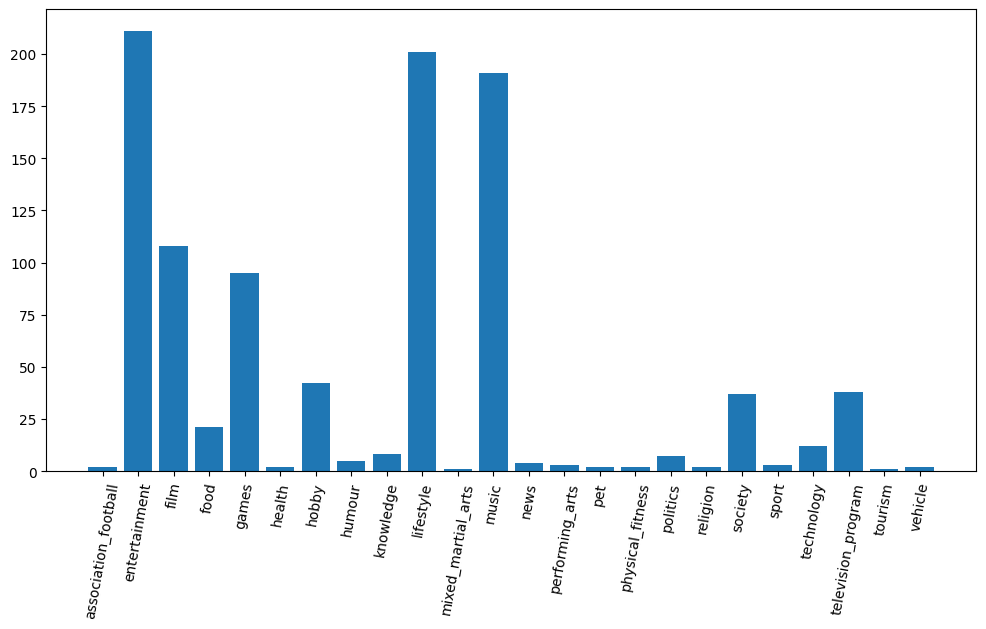

In [9]:
plt.figure(figsize=(12,6))
plt.bar(temp['Categories'], temp['Count'])
plt.xticks(rotation= 80)
plt.show()

We can see that Entertainment, Films, Music, Games and Lifestyle are the hot topics in Youtube

In [10]:
temp = df.groupby('Country')[['Rank']].count().reset_index()
temp.rename(columns={'Rank': 'Count'}, inplace= True)
temp.head()

,Country,Count
0,AE,9
1,AR,14
2,AT,1
3,AU,6
4,BD,2


In [11]:
import country_converter as coco

temp['Country'] = temp['Country'].apply(lambda x: coco.convert(names= x, to='ISO3'))
temp['Country_name'] = temp['Country'].apply(lambda x: coco.convert(names= x, to='name_short'))
temp.head()

,Country,Count,Country_name
0,ARE,9,United Arab Emirates
1,ARG,14,Argentina
2,AUT,1,Austria
3,AUS,6,Australia
4,BGD,2,Bangladesh


In [17]:
fig = px.choropleth(temp, locations= 'Country', color= 'Count', hover_name= 'Country_name', title='Channels in top 1000 per country')

fig.show()

In [20]:
temp = df.groupby('Country')[['Visits', 'Likes', 'Comments']].mean().reset_index()
temp['Country'] = temp['Country'].apply(lambda x: coco.convert(names= x, to='ISO3'))
temp['Country_name'] = temp['Country'].apply(lambda x: coco.convert(names= x, to='name_short'))


In [21]:
fig = px.choropleth(temp, locations= 'Country', color= 'Visits', hover_name= 'Country_name', title='Mean visits in top 1000 channels per country')

fig.show()

In [22]:
fig = px.choropleth(temp, locations= 'Country', color= 'Likes', hover_name= 'Country_name', title='Mean likes in top 1000 channels per country')

fig.show()

In [23]:
fig = px.choropleth(temp, locations= 'Country', color= 'Comments', hover_name= 'Country_name', title='Mean comments in top 1000 channels per country')

fig.show()

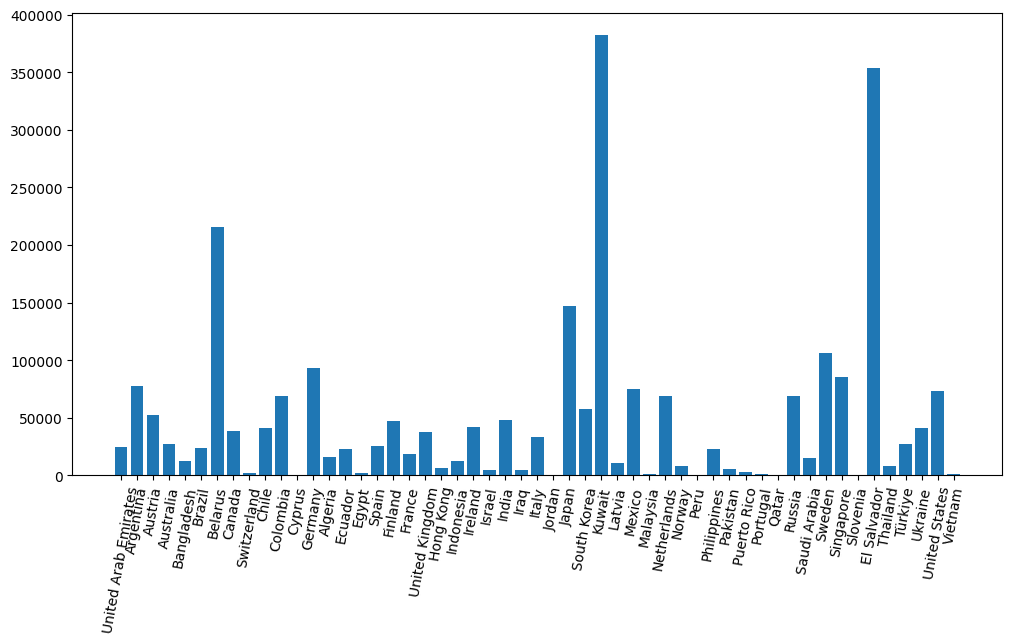

In [28]:
plt.figure(figsize=(12,6))
plt.bar(temp['Country_name'], temp['Likes'])
plt.xticks(rotation= 80)
plt.show()

These graphs doesn't show much relevant information, the only outstanding countries in the map are Belarus, Kuwait and El Salvador, showing that their channels have a high visits, likes and comments means. But Belarus and El Salvador have only 2 channels on top 1000 and Kuwait has only 1.

Would be impressive if a country with lots of channels were highlighted on the map.

## Checking some correlations 

### Subscribers with Visits, Likes, Comments

In [13]:
df_corr = df[['Suscribers', 'Visits', 'Likes', 'Comments']]

In [14]:
corr = df_corr.corr()

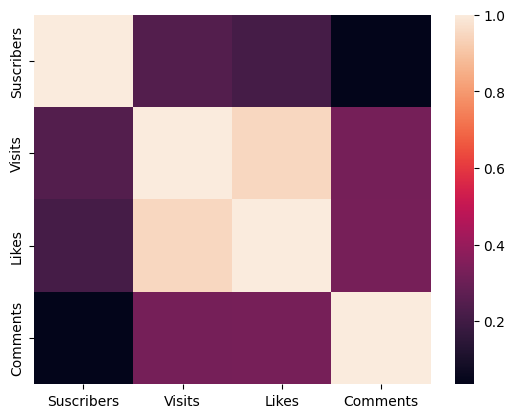

In [15]:
import seaborn as sns

sns.heatmap(corr)
plt.show()

We can see that the number of subscribers are not correlated to the number of vitis, likes or comments. But we found out that there is a strong correlation between Visits and Likes.

The result of the correlation with Comments was a bit expected, a lot of Youtube channels tend to unnable the comment section from their videos.

What I can take from the result in general, is that there are a lot of user that don't watch the videos of the channels that they are subscribed, and consequently dont like the videos. Some people just subscribe to the channel and don't watch much of their videos.

The correlation between Visits and Likes wasn't what I was looking for, but it makes perfect sense. The more people watch your videos, the more likes you get (with you are good, of course, but we are talking about the bests Youtube channels worldwide)

## A bit more about brazilian channels

In [37]:
br = df.loc[df['Country'] == 'BR']
br.shape

(72, 9)

In [41]:
temp = br.groupby('Categories')['Rank'].count().reset_index()
temp.rename(columns={'Rank': 'Count'}, inplace=True)

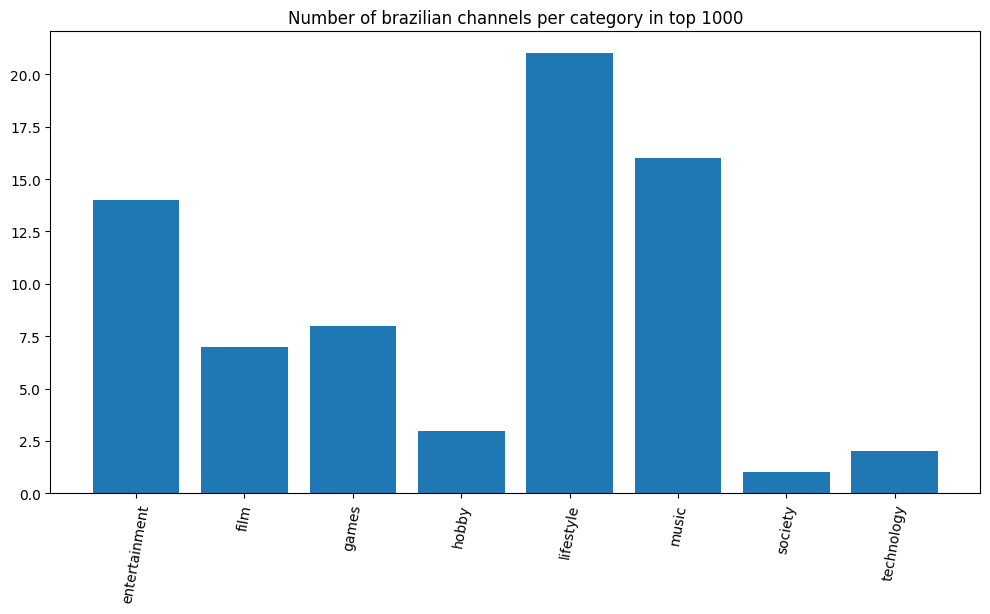

In [42]:
plt.figure(figsize=(12,6))
plt.bar(temp['Categories'], temp['Count'])
plt.xticks(rotation= 80)
plt.title('Number of brazilian channels per category in top 1000')

plt.show()